<a href="https://colab.research.google.com/github/M4NCHU/AI-Project/blob/main/chess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Wczytanie danych

In [1]:
!pip install tensorflow opencv-python matplotlib 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install -q kaggle

In [3]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle.json': b'{"username":"m4nchu","key":"d7a7354ee12867e955c8123536c83f8e"}'}

In [4]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [5]:
! cp kaggle.json ~/.kaggle/

In [18]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          29903        825  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           2944         83  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           5280        108  1.0              
mohithsairamreddy/salary-data 

In [168]:
!kaggle datasets download -d niteshfre/chessman-image-dataset

 92% 53.0M/57.6M [00:00<00:00, 90.0MB/s]
100% 57.6M/57.6M [00:00<00:00, 69.1MB/s]


In [169]:
!unzip /content/chessman-image-dataset.zip

Archive:  /content/chessman-image-dataset.zip
  inflating: Chessman-image-dataset/Chess/Bishop/00000000.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000001.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000002.JPG  
  inflating: Chessman-image-dataset/Chess/Bishop/00000003.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000004.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000006.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000007.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000008.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000009.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000010.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000011.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000012.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000013.jpg  
  inflating: Chessman-image-dataset/Chess/Bishop/00000015.png  
  inflating: Chessman-image-dataset/Chess/Bishop/00000016.

In [10]:
!pip list

Package                       Version
----------------------------- ---------------------
absl-py                       1.4.0
alabaster                     0.7.13
albumentations                1.2.1
altair                        4.2.2
anyio                         3.6.2
appdirs                       1.4.4
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
array-record                  0.2.0
arviz                         0.15.1
astropy                       5.2.2
astunparse                    1.6.3
attrs                         23.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.12.1
backcall                      0.2.0
beautifulsoup4                4.11.2
bleach                        6.0.0
blis                          0.7.9
blosc2                        2.0.0
bokeh                         2.4.3
branca                        0.6.0
build                         0.10.0
CacheControl                  0.12.11
ca

In [235]:
!pip install sklearn
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#  import biblioteki TensorFlow, która jest narzędziem do tworzenia i trenowania modeli uczenia maszynowego
import tensorflow as tf
import os
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

In [4]:
# konfiguracja wykorzystania pamięci GPU w bibliotece TensorFlow.
# ustawia tryb dynamicznego przydzielania pamięci. Oznacza to, że TensorFlow będzie elastycznie alokować tylko tyle pamięci GPU, ile jest potrzebne dla bieżących obliczeń
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
  #  pobiera listę dostępnych urządzeń GPU w systemie.
  tf.config.experimental.set_memory_growth(gpu, True)

In [5]:
tf.config.list_physical_devices('GPU')

[]

# Usuwanie niepotrzebnych zdjęć

In [6]:
import cv2
import imghdr

In [49]:
# folder ze zdjęciami
data_dir = 'Chessman-image-dataset/Chess' 



image_size = (224,224)
batch = 16

train = keras.preprocessing.image_dataset_from_directory(
    'Chessman-image-dataset/Chess/',
    validation_split=.2,
    subset='training',
    seed=2022,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 542 files belonging to 6 classes.
Using 434 files for training.


In [8]:
validation = keras.preprocessing.image_dataset_from_directory(
    'Chessman-image-dataset/Chess/',
    validation_split=.2,
    subset='validation',
    seed=2022,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 542 files belonging to 6 classes.
Using 108 files for validation.


In [9]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

(224, 224, 3)


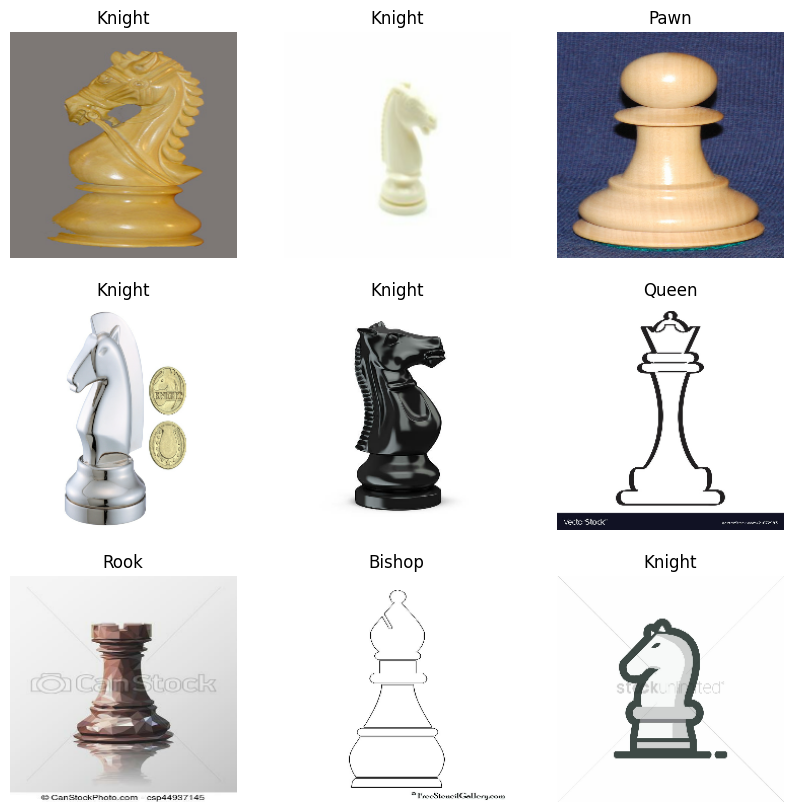

In [10]:
display_samples(train, 9, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

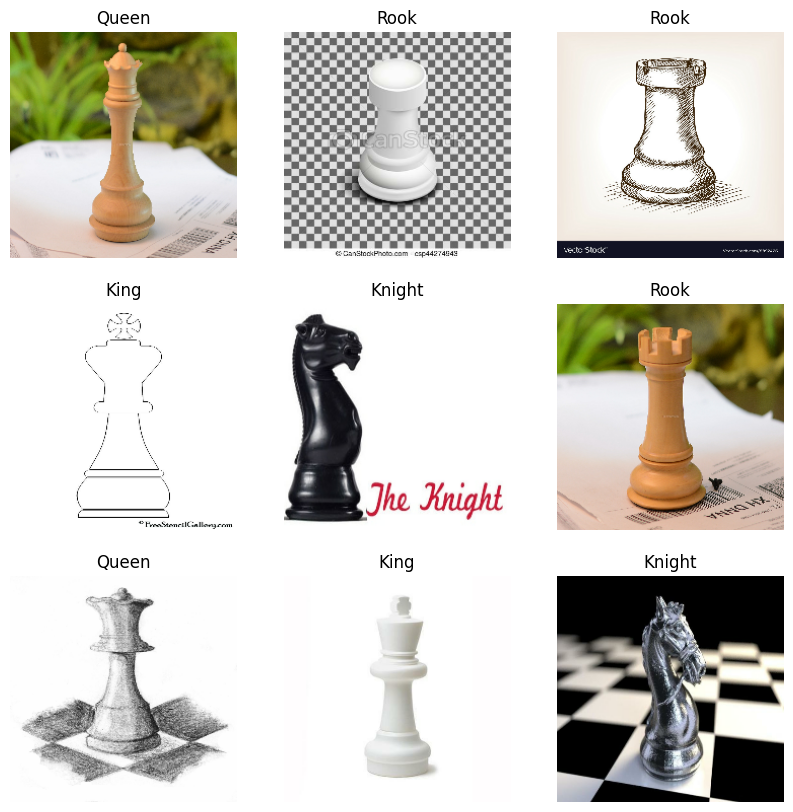

In [11]:
display_samples(validation, 9, validation.class_names)

In [12]:
class_names = train.class_names
labels = np.array([])
for _, label in train:
    labels = np.concatenate((labels, np.argmax(label, axis=-1)))
_, counts = np.unique(labels, return_counts=True)
'''print(labels)'''

'print(labels)'

In [13]:
total = counts.sum()
print("Class Distribution")
for i in range(len(counts)):
    print(f'{class_names[i]}: {counts[i]}({(counts[i] / total)*100:.2f}%)')

Class Distribution
Bishop: 66(15.21%)
King: 59(13.59%)
Knight: 83(19.12%)
Pawn: 88(20.28%)
Queen: 63(14.52%)
Rook: 75(17.28%)


In [14]:
os.listdir(os.path.join(data_dir, 'Bishop'))

['00000075.jpg',
 '00000026.jpg',
 '00000020.jpg',
 '00000004.jpg',
 '00000199.jpg',
 '00000010.jpg',
 '00000019.jpg',
 '00000070.jpg',
 '00000192.jpg',
 '00000074.jpg',
 '00000068.png',
 '00000195.jpg',
 '00000031.jpg',
 '00000168.jpg',
 '00000061.jpg',
 '00000013.jpg',
 '00000117.jpg',
 '00000186.jpg',
 '00000039.jpg',
 '00000016.jpg',
 '00000066.jpg',
 '00000086.png',
 '00000037.jpg',
 '00000024.jpg',
 '00000110.jpg',
 '00000151.png',
 '00000012.jpg',
 '00000089.jpg',
 '00000094.jpg',
 '00000007.jpg',
 '00000167.jpg',
 '00000169.jpg',
 '00000145.jpg',
 '00000174.jpg',
 '00000092.jpg',
 '00000000.JPG',
 '00000127.jpg',
 '00000028.jpg',
 '00000178.jpg',
 '00000008.jpg',
 '00000130.png',
 '00000003.png',
 '00000112.jpg',
 '00000177.jpg',
 '00000175.jpg',
 '00000193.jpg',
 '00000054.jpeg',
 '00000079.jpg',
 '00000120.jpg',
 '00000025.jpg',
 '00000136.png',
 '00000071.png',
 '00000002.JPG',
 '00000078.jpg',
 '00000189.jpg',
 '00000044.png',
 '00000138.jpg',
 '00000001.jpg',
 '00000006.jp

In [15]:
# Dozwolone rozszerzenia plików
image_ext = ['jpeg','jpg', 'bmp', 'png']

In [20]:
# Sprawdzanie czy wszystkie rozszerzenia są poprawne
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_ext: 
                print('Zdjęcie posiada niepoprawne rozszerzenie {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Błąd ze zdjęciem {}'.format(image_path))
            # os.remove(image_path)

In [52]:
data = tf.keras.utils.image_dataset_from_directory('/content/Chessman-image-dataset/Chess')

Found 542 files belonging to 6 classes.


In [53]:
data_iterator = data.as_numpy_iterator()

In [54]:
batch = data_iterator.next()

# Wczytywanie danych

In [21]:
# tf.data.Dataset??

In [22]:
import numpy as np
from matplotlib import pyplot as plt

In [23]:
# Budowanie bazę zdjęc w locie, przez co nie trzeba budować klas itp.
# tworzenia obiektu zbioru danych z katalogu zawierającego obrazy

# data = tf.keras.utils.image_dataset_from_directory('Chessman-image-dataset/Chess')

# Preprocessing


# Model

In [34]:
# train

In [35]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
# tworzy pusty model sekwencyjny w bibliotece Keras.
# model = Sequential()

In [37]:

# Te linie kodu definiują architekturę modelu sieci neuronowej.
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.01)

model = keras.Sequential()
model.add(Conv2D(16, (5, 5), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
#model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.2))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D((2,2) , strides = 2 , padding = 'same'))
model.add(BatchNormalization(axis=3))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     1

In [38]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [39]:
epochs = 20
hist = model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/20
28/28 [==============================] - 91s 3s/step - loss: 4.1459 - accuracy: 0.1774 - val_loss: 4.5693 - val_accuracy: 0.1111
Epoch 2/20
28/28 [==============================] - 78s 3s/step - loss: 3.1107 - accuracy: 0.3802 - val_loss: 3.7659 - val_accuracy: 0.1852
Epoch 3/20
28/28 [==============================] - 76s 3s/step - loss: 2.8769 - accuracy: 0.4447 - val_loss: 3.2714 - val_accuracy: 0.2407
Epoch 4/20
28/28 [==============================] - 83s 3s/step - loss: 2.5448 - accuracy: 0.5323 - val_loss: 3.2998 - val_accuracy: 0.2130
Epoch 5/20
28/28 [==============================] - 78s 3s/step - loss: 2.1885 - accuracy: 0.6267 - val_loss: 3.2200 - val_accuracy: 0.1759
Epoch 6/20
28/28 [==============================] - 76s 3s/step - loss: 1.9422 - accuracy: 0.6959 - val_loss: 3.3611 - val_accuracy: 0.1667
Epoch 7/20
28/28 [==============================] - 83s 3s/step - loss: 1.7738 - accuracy: 0.7074 - val_loss: 2.7666 - val_accuracy: 0.3148
Epoch 8/20
28/28 [==

In [40]:
# Ta linia kodu kompiluje model, przygotowując go do procesu uczenia.
# model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [41]:

# Ta linia kodu wypisuje podsumowanie architektury modelu.
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 112, 112, 16)     64        
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 112, 112, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 32)     1

Trening


Wydajność

Loss

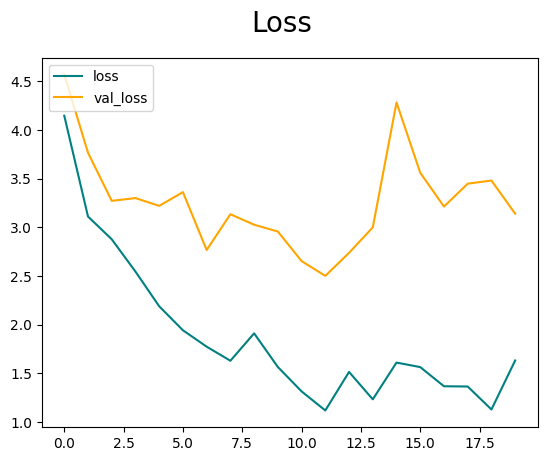

In [42]:

# Ten fragment kodu tworzy wykres z historią funkcji straty (loss) dla treningu i walidacji.
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Dokładność

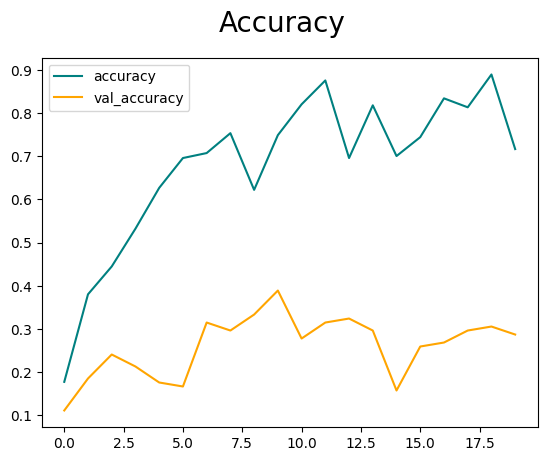

In [43]:
# Ten fragment kodu tworzy wykres z historią metryki dokładności (accuracy) dla treningu i walidacji.

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# Ocena

In [47]:
y_pred = np.argmax(model.predict(validation), axis=-1)

predictions = np.array([])
labels =  np.array([])
for x, y in validation:
    predictions = np.concatenate([predictions, np.argmax(model.predict(x), axis=-1)])
    labels = np.concatenate([labels, np.argmax(y.numpy(), axis=-1)])

1/1 [==============================] - 0s 383ms/step


<Axes: >

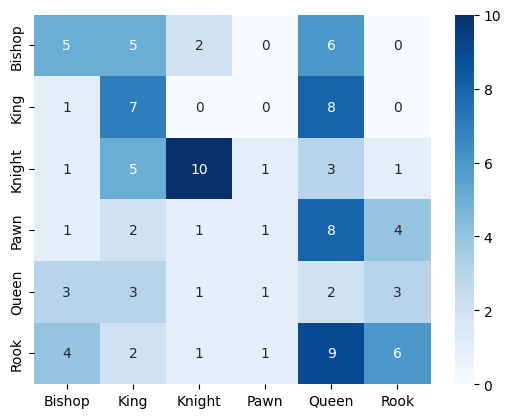

In [48]:
conf = tf.math.confusion_matrix(labels=labels, predictions=predictions)
sns.heatmap(conf, annot=True, cmap='Blues', yticklabels=class_names, xticklabels=class_names)

In [44]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [45]:
# Ten fragment kodu tworzy trzy obiekty metryk w bibliotece Keras: Precision, Recall i BinaryAccuracy.
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [58]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


# Testowanie

1/1 [==============================] - 0s 61ms/step
Przewidziana figura: Queen


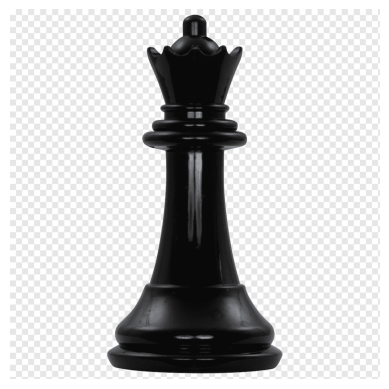

In [63]:
def predict_figure(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = image / 255.0
    image = np.expand_dims(image, axis=0)

    predictions = model.predict(image)
    class_index = np.argmax(predictions)
    class_name = class_names[class_index]

    return class_name

# Ścieżka do pliku, który ma zostać przewidziany
image_path = "queen.png"

# Przewidywanie figury
predicted_figure = predict_figure(image_path)
print("Przewidziana figura:", predicted_figure)

# Wyświetlenie obrazu
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)
plt.axis('off')
plt.show()

In [64]:
from tensorflow.keras.models import load_model

In [65]:
# Ten fragment kodu zapisuje wytrenowany model do pliku o nazwie "imageclassifier.h5" w podfolderze "models".
model.save(os.path.join('models','imageclassifier.h5'))

In [66]:

# Ten fragment kodu wczytuje model z pliku "imageclassifier.h5", który został wcześniej zapisany, i przypisuje go do zmiennej new_model.
new_model = load_model('models/imageclassifier.h5')